In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# Importing libraries
# Data Processing
import pandas as pd
import numpy as np

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from scipy.stats import randint

In [2]:
# Loading data

!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 
  
# metadata 
print(predict_students_dropout_and_academic_success.metadata) 
  
# variable information 
print(predict_students_dropout_and_academic_success.variables) 


{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

In [3]:
# Combine features and target into one DataFrame
df = pd.concat([X, y], axis=1)

# Show the first few rows
print(df.head())


   Marital Status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0     

In [4]:
df

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [5]:
df.duplicated().sum()

0

**Converting categorical data into binary classification**

In [6]:
# Convert target to binary classification
df['pass_fail'] = (df['Target'] == 'Graduate').astype(int)

# Drop the original target column
df = df.drop(columns=['Target'])

# Check final dataset
print(df.head())

   Marital Status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0     

In [7]:
df

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,pass_fail
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


**Split into features (X) and target (y)**

In [8]:
# Features: all columns except 'pass_fail'
X = df.drop(columns=['pass_fail'])

# Target: the pass/fail column
y = df['pass_fail']


**Split data into train and test sets**

✅ Explanation:

> test_size=0.2 → 80% training, 20% testing

> random_state=42 → ensures same split every time

> stratify=y → keeps same dropout/graduate ratio in both sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% test data
    random_state=42,    # reproducibility
    stratify=y          # keeps class balance
)


**From nowon we will plant, which will grow into dark forest - Random Forest for decision making**

In [28]:
rf = RandomForestClassifier(
    n_estimators = 100,      # number of trees
    max_depth = None,
    random_state = 42
)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Let's train our *Random Forest model* and see how many students will fall in the battle of school. How many brave warriors will meet and feast with Odin? The war is about to begin!**

In [17]:
y_pred = rf.predict(X_test)

# Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8180790960451978

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.81       443
           1       0.80      0.85      0.82       442

    accuracy                           0.82       885
   macro avg       0.82      0.82      0.82       885
weighted avg       0.82      0.82      0.82       885


Confusion Matrix:
 [[350  93]
 [ 68 374]]


**Now let's check what features is the most important and predictive for student success.**

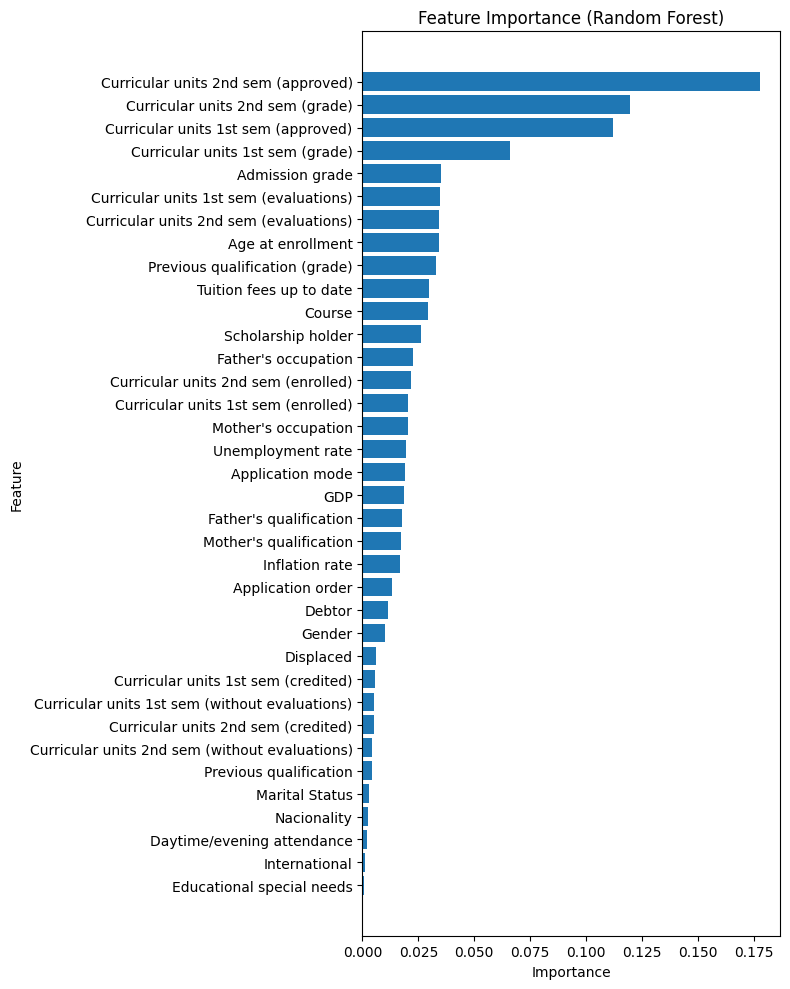

In [18]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
feature_names = X.columns

# Sort by importance
sorted_idx = importances.argsort()

plt.figure(figsize=(8, 10))
plt.barh(feature_names[sorted_idx], importances[sorted_idx])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


**Now let's visualize and plot Confusion Matrix**

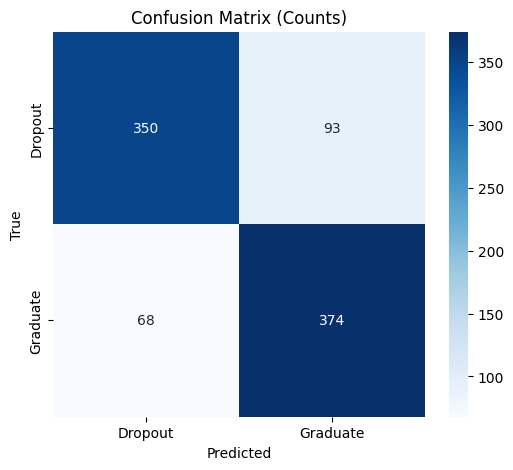

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Class names
class_names = ['Dropout', 'Graduate']

# Plot confusion matrix using Seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Counts)')
plt.show()


**Doing the same Confusion Matrix, but with percentage of accuracy**

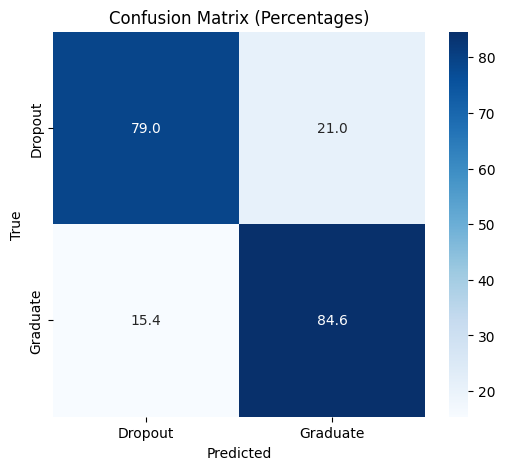

In [22]:
# Normalize confusion matrix to percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, None] * 100

plt.figure(figsize=(6,5))
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Percentages)')
plt.show()


**Plotting Random Forest 3 trees**

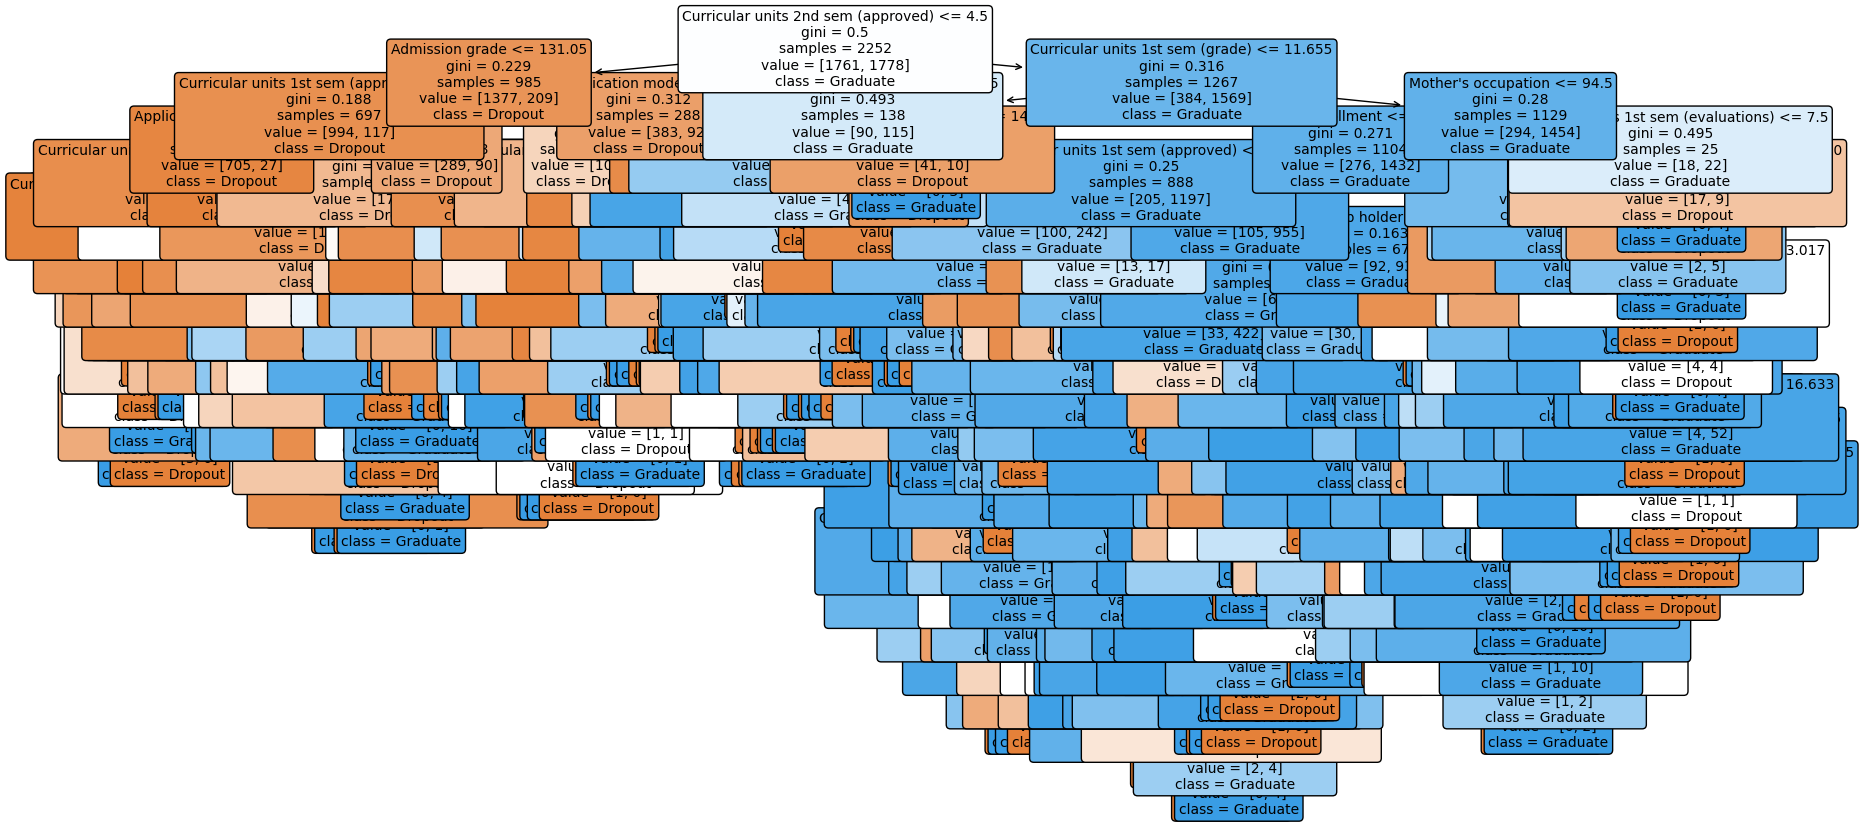

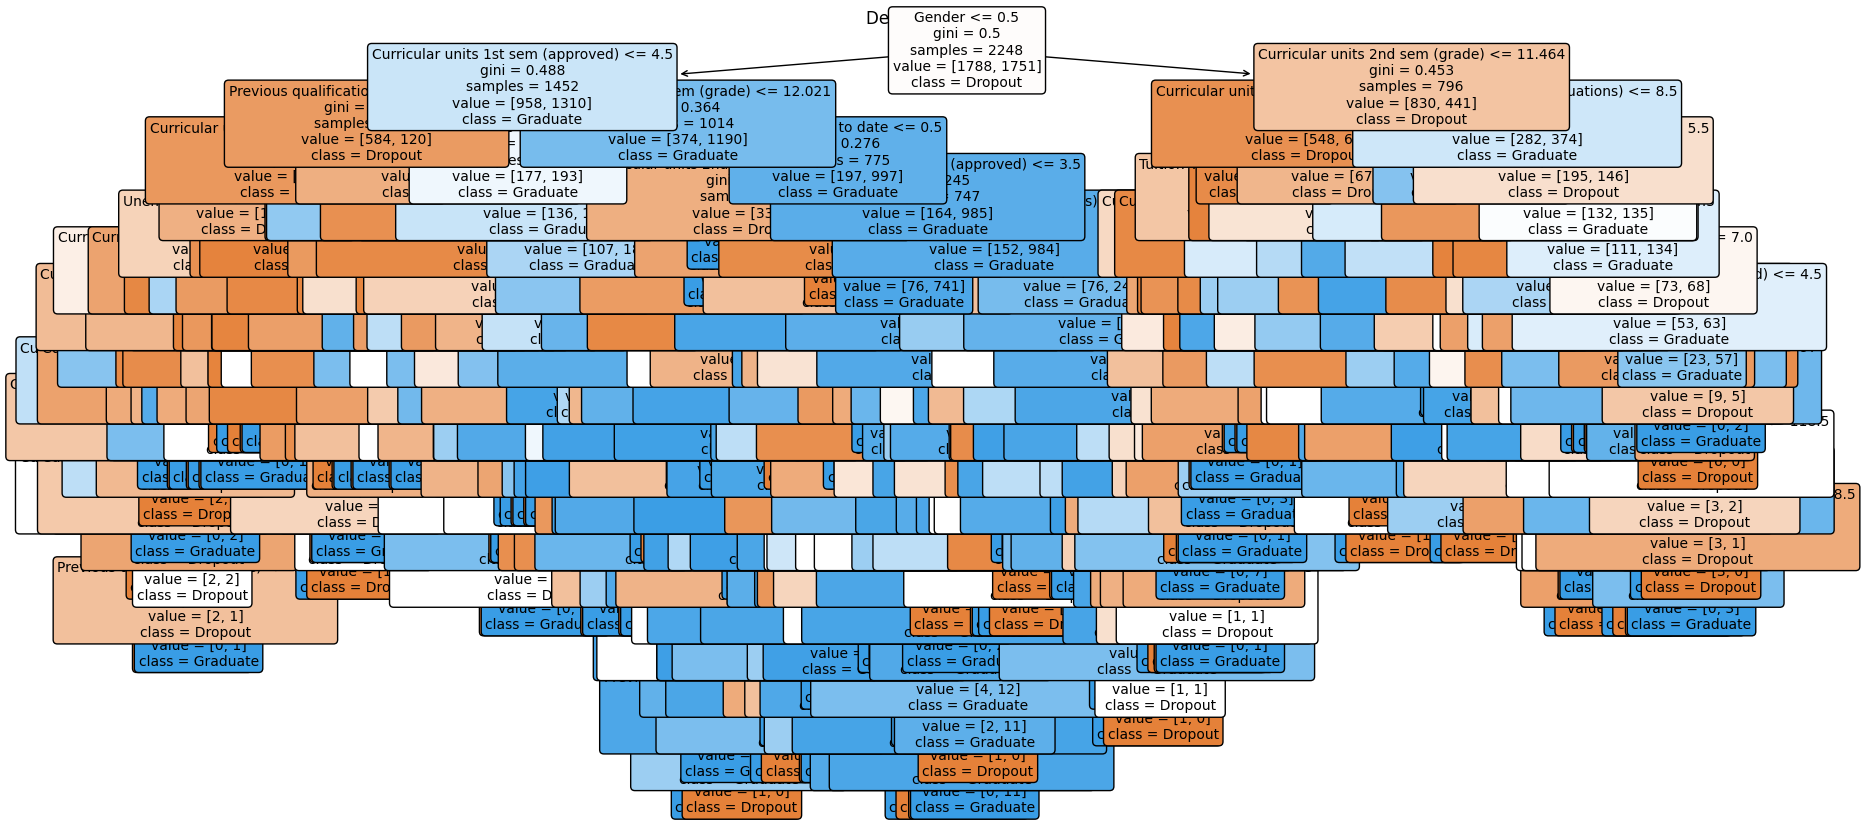

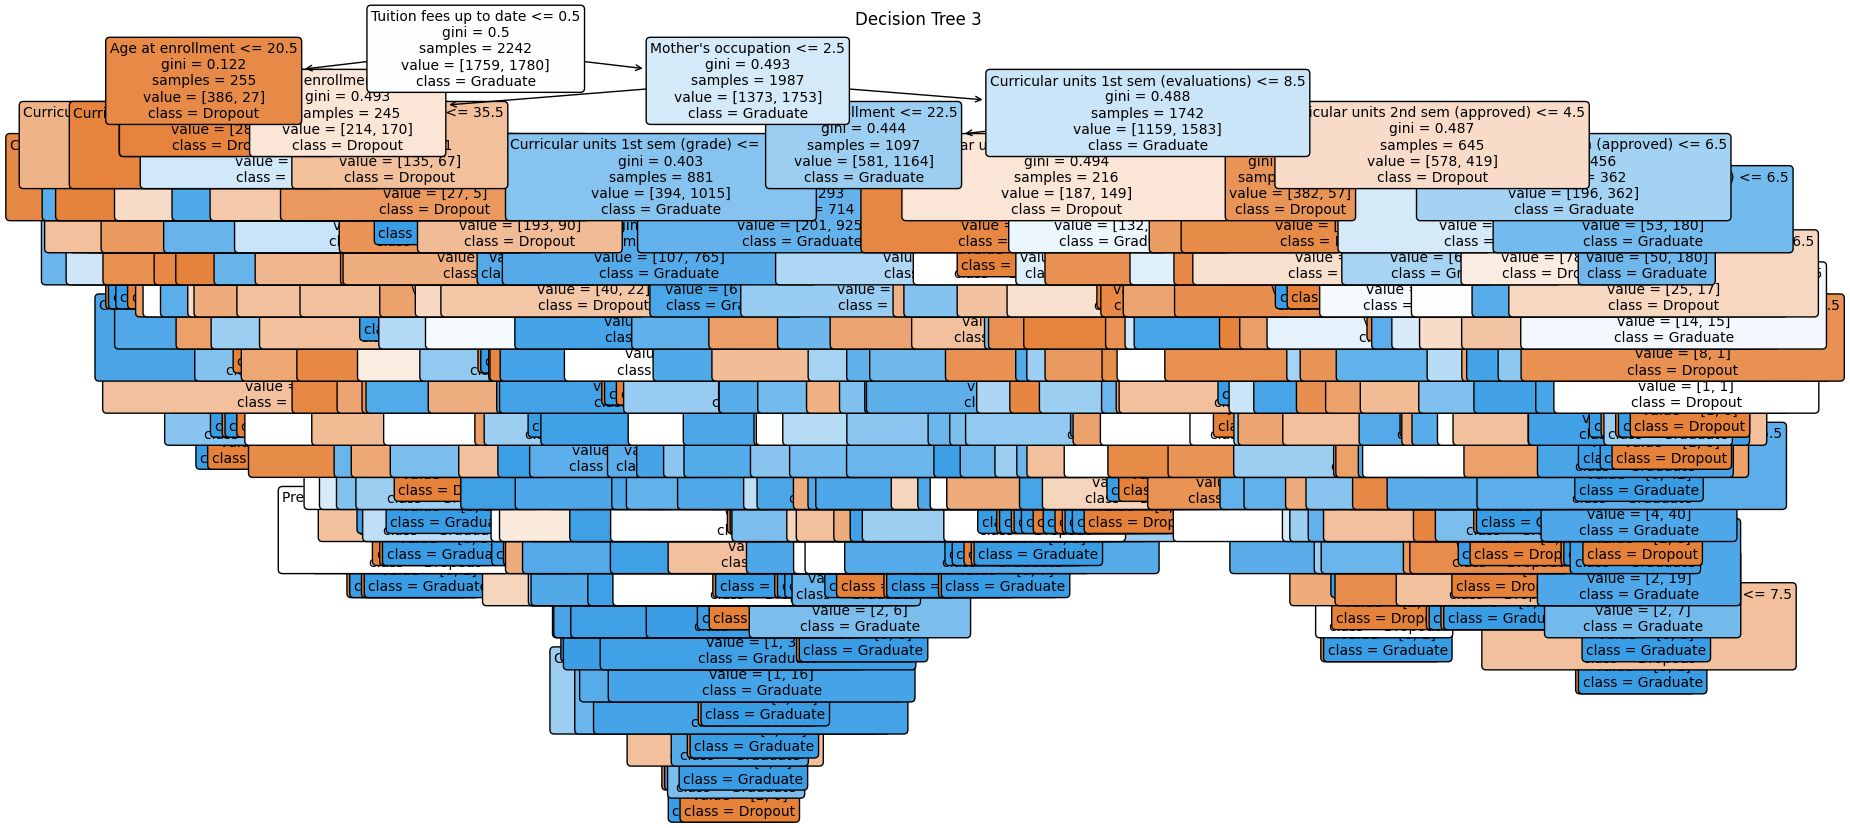

In [29]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize first 3 trees
num_trees = 3

for i in range(num_trees):
    plt.figure(figsize=(20,10))
    plot_tree(
        rf.estimators_[i],        # use trained Random Forest model
        feature_names=X.columns,      # feature names
        class_names=['Dropout','Graduate'],  # optional
        filled=True,                  
        rounded=True,
        fontsize=10
    )
    plt.title(f'Decision Tree {i+1}')
    plt.show()


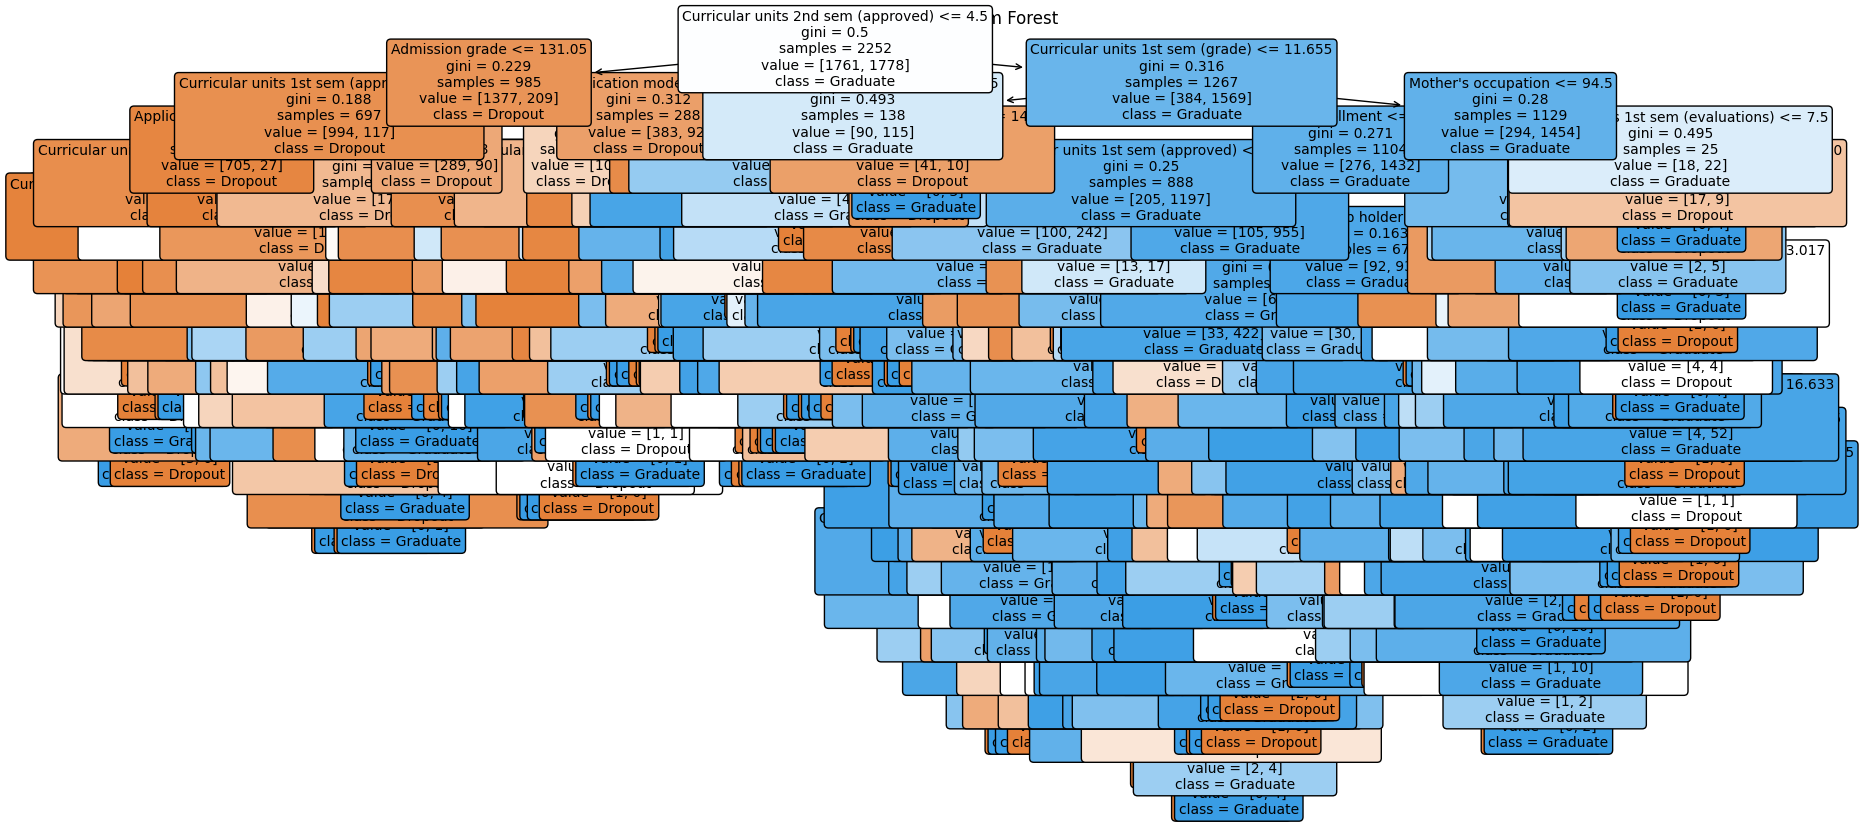

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the first tree in the Random Forest
plt.figure(figsize=(20,10))
plot_tree(
    rf.estimators_[0],           # first tree (index 0)
    feature_names=X.columns,     # feature names
    class_names=['Dropout','Graduate'],  # optional class labels
    filled=True,                 
    rounded=True,
    fontsize=10
)
plt.title('Decision Tree 1 of Random Forest')
plt.show()
